In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [22]:
ruta ='../extras/Google Maps/reviews-estados'

In [23]:
metadata_google = pd.read_json('../extras/Google Maps/bussiness_google.json.gz', compression='gzip')


Cargo los datasets de los estados seleccionados en uno unico

In [24]:
estados = ['California', 'New_Jersey', 'Florida', 'Illinois']  # Datasets usados para el estudio

df_states = pd.DataFrame()

for estado in estados:
    ruta_archivo = f'{ruta}/review-{estado}/all_{estado}.parquet'
    review_estado = pd.read_parquet(ruta_archivo)

    # Agrega la columna 'state' con el valor del estado actual
    review_estado['state'] = estado

    df_states = pd.concat([df_states, review_estado], ignore_index=True)

# df_states ahora contiene la concatenación de todos los DataFrames de los diferentes estados, con la columna 'state' agregada


Normalizo un estado

In [25]:
df_states['state'].replace('New_Jersey','New Jersey',inplace=True)

In [26]:
df_states.head()

,user_id,name,time,rating,text,pics,gmap_id,resp_time,resp_text,state
0,1.089912e+20,Song Ro,2021-01-06 05:12:07.056,5,Love there korean rice cake.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California
1,1.112903e+20,Rafa Robles,2021-02-09 05:47:28.663,5,Good very good,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California
2,1.126404e+20,David Han,2020-03-08 05:04:42.296,4,They make Korean traditional food very properly.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California
3,1.174403e+20,Anthony Kim,2019-03-07 05:56:56.355,5,Short ribs are very delicious.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California
4,1.005808e+20,Mario Marzouk,2017-05-16 05:01:41.933,5,Great food and prices the portions are large,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California


Elimino duplicados en user_id time y gmap_id en conjunto

In [27]:
df_states.drop_duplicates(subset=['user_id','time','gmap_id'],inplace=True)

Elimino la columna pics que no sera usada

In [28]:
df_states.drop(columns='pics',inplace=True)


In [29]:
df_states.sample(5)

,user_id,name,time,rating,text,gmap_id,resp_time,resp_text,state
1115214,1.168975e+20,Alan Hernandez,2020-01-14 05:41:15.939,4,None,0x80daf95decf9fe77:0xbcf57e3ec378be10,NaT,None,California
5802969,1.113231e+20,Emil Esmurdoc,2021-06-11 14:52:57.633,5,None,0x88d9bb3fce77dbbb:0xaafa88db11af4375,NaT,None,Florida
6221688,1.100853e+20,Maria Manjelo,2021-04-02 22:22:28.276,5,"Worth the wait. Very delicious, outstanding se...",0x88e4279668c1a2f1:0x8c1cd12f09764aeb,NaT,None,Florida
1431247,1.053027e+20,Jon Dale,2021-03-10 06:33:27.686,5,None,0x80dc7a69338e19f1:0xf9f01acc85b937ee,NaT,None,California
4434661,1.176328e+20,Charles Schmidt,2018-08-04 11:20:08.842,4,Very good.,0x89c18371fb9b35e7:0xd420e54ef4b4a7a1,NaT,None,New Jersey


Convierto la fecha a time

In [30]:
df_states['year'] = df_states['time'].dt.year

In [31]:
df_states['year'].value_counts()

year
2019    2708067
2018    2131682
2020    1759673
2017    1179738
2021    1025434
2016     368949
2015      80596
2014      29503
2013      20937
2012      11331
2011       8459
2010       3465
2009        385
2008        190
2007         94
2006         75
2005         61
2004         39
2003         23
1990          8
2002          6
1999          1
2001          1
Name: count, dtype: int64

C:\Users\bruno\AppData\Local\Temp\ipykernel_16916\2547165849.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_states[df_states['year']>2008],x='year',palette='dark',bins=10)


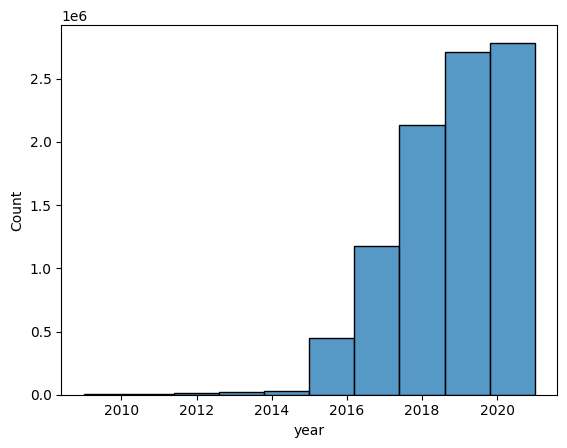

In [32]:
sns.histplot(data=df_states[df_states['year']>2008],x='year',palette='dark',bins=10)
plt.show()

# Puede observarse que para años anteriores a 2016 las reseñas son insignificantes.

# Hago una cruza con la data de los sitios de google para ver las reviews de restaurantes

In [33]:
metadata_google.sample(5)

,gmap_id,latitude,longitude,category,stars,name,state
688835,0x89c1064a0c0f7829:0x391334c82192c9f8,39.705614,-74.276500,['Chinese restaurant' 'Asian restaurant'],2.9,Golden Jade,New Jersey
408260,0x80dd32ad8f0a6df1:0x5f958683962b6b2f,33.888972,-118.122475,['Chicken restaurant'],4.7,Grandma's Chicken,California
470820,0x808df890c5bf4719:0x488b7ab5a8c7d120,36.672535,-121.641595,['Restaurant'],4.6,La Paloma,California
323588,0x80db7de50a3b8f11:0x6de79bf75c42a3b2,33.556156,-117.157928,['Sandwich shop' 'Caterer' 'Fast food restaura...,3.6,Subway,California
413778,0x80d95364e5802349:0xe28712ceb247bc81,32.716535,-117.140045,['Restaurant'],4.5,Golden Hill Cafe.,California


In [34]:
metadata_google[['gmap_id','category']]

,gmap_id,category
4,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,['Restaurant']
5,0x88c2e4e34f1ed783:0x76c5da381c499d79,['Buffet restaurant']
46,0x8890b9241e704667:0x3a1e565c17c00993,['Restaurant']
81,0x88e635378f43352f:0xa1b53c63436fa428,['Gas station' 'ATM' 'Convenience store' 'Rest...
156,0x88d9ab98b5baad79:0x1a2e3f0642a55246,['Mexican restaurant']
...,...,...
693466,0x89c3b2b8e9c8c357:0xb1b07826ef85a598,['Bar' 'Italian restaurant' 'Pub' 'Restaurant']
693471,0x89c24d60acc3ffff:0xc8048546518281f6,['Restaurant' 'Family restaurant']
693475,0x89c24d7a198a3541:0x3dcb8f429c053248,['American restaurant']
693478,0x89c3b290dcc12d6d:0x34ad59938efed577,['Latin American restaurant' 'Mexican restaura...


Encuentro las review que por gmap_id pertenescan a los locales de restaurante.

In [35]:
df_states = df_states[df_states['gmap_id'].isin(metadata_google['gmap_id'])]

## Analisis de sentimiento usando TextBlob

In [36]:
from textblob import TextBlob


In [37]:


df_states['sentiment_textblob'] = df_states['text'].apply(lambda x:0 if x is None else TextBlob(x).sentiment.polarity)
df_states['sentiment_textblob_resp'] = df_states['resp_text'].apply(lambda x:0 if x is None else TextBlob(x).sentiment.polarity)



Exploro y comparo ratings con score del sentimiento

In [38]:
df_states.sample(5)

,user_id,name,time,rating,text,gmap_id,resp_time,resp_text,state,year,sentiment_textblob,sentiment_textblob_resp
5588276,1.011721e+20,Bryan Morris,2020-12-18 04:09:06.069,3,"Service was okay; I ordered a ""spicy"" #10, but...",0x88e5bfc659799f5b:0xe866f5d617b6cc6,NaT,None,Florida,2020,0.042929,0.0
5773497,1.109643e+20,Kim,2019-06-10 11:32:29.076,4,Really did love the ambience and decor. Sat ou...,0x88e729364230818f:0xa6470abc0a3d1867,2019-06-11 15:13:14.948999936,Thank you for joining us. We hope to see you a...,Florida,2019,0.425278,0.0
2359610,1.033120e+20,Melchor Aldaco,2019-08-13 21:34:34.415,5,None,0x80db1ce4211fee5b:0x579bfea868f6392a,NaT,None,California,2019,0.000000,0.0
8786907,1.166135e+20,Michael Schmalz,2020-08-07 22:36:38.026,4,None,0x880fcc7ded7d982d:0xd20df110c90fc74a,NaT,None,Illinois,2020,0.000000,0.0
5745712,1.107330e+20,Kamryn Sanders,2020-10-14 03:01:29.683,1,None,0x88dd6b2cbe8bfe8f:0x18dfd771da287def,NaT,None,Florida,2020,0.000000,0.0


In [39]:
df_states[df_states['sentiment_textblob']<0].sample(5)

,user_id,name,time,rating,text,gmap_id,resp_time,resp_text,state,year,sentiment_textblob,sentiment_textblob_resp
3657564,1.001272e+20,Vikki Pierson,2020-08-27 01:39:56.019,4,Town has a flying termite problem so the secon...,0x89c6cbfa126f28cb:0x7a0d1dd09d8f8a91,NaT,None,New Jersey,2020,-0.037500,0.0
1156045,1.128046e+20,Roomal Ahmadzai,2017-09-06 21:47:44.214,1,That will be my last day... very bad food the...,0x80844aff4f1ef585:0x6c9799a496c37c46,NaT,None,California,2017,-0.536667,0.0
939282,1.177162e+20,David Schneider,2018-09-09 01:05:34.913,3,Confused staff confused food confused beer thi...,0x80eeaba39ac328b9:0xecba7aa0c4f95cc2,NaT,None,California,2018,-0.400000,0.0
2225538,1.048221e+20,Michelle Morris,2016-07-26 01:19:00.955,3,Convenient but staff are very rude.,0x809524489dae64cd:0xc8d5884738541799,NaT,None,California,2016,-0.390000,0.0
6184038,1.024294e+20,Jessica R Felder,2021-04-06 15:49:43.412,1,Piss poor service!!! Will never visit this pla...,0x88def27a63a8e48f:0x49d1de95978c78c1,NaT,None,Florida,2021,-0.540625,0.0


### Voy a generar el criterio que en el sentimiento se obtenga un valor cuantificable mas real, normalizando el ranting y sumandole al socre

In [40]:
df_states['sentiment'] = df_states['rating'] / 5. + df_states['sentiment_textblob']

In [41]:
df_states.sample(5)


,user_id,name,time,rating,text,gmap_id,resp_time,resp_text,state,year,sentiment_textblob,sentiment_textblob_resp,sentiment
5739827,1.088351e+20,Michele Jordan,2019-08-05 22:19:24.294,4,yum. but this location was super slow,0x88dd473f7b912acf:0xe138be6b3fdd11e8,NaT,None,Florida,2019,0.016667,0.0,0.816667
648102,1.080181e+20,Vincent Bibbee,2018-08-11 23:31:55.505,5,Always great food and service.,0x80dcaf45a49656df:0x99d7cac698af187d,NaT,None,California,2018,0.800000,0.0,1.800000
5376309,1.019300e+20,Giselle Marzano,2018-02-22 22:47:48.003,2,"Took too long to have order taken, the food wa...",0x88c2e3f645d0c0c1:0xe4d0b40a7feb3611,NaT,None,Florida,2018,0.316667,0.0,0.716667
5351408,1.055078e+20,Courtney W. May,2017-08-07 15:12:18.195,5,None,0x88e7c4eb0840b44b:0x5042d18bac575272,NaT,None,Florida,2017,0.000000,0.0,1.000000
5681762,1.011276e+20,Stephanie L Smith,2018-12-02 20:01:19.549,4,"Food was alright, server was over friendly.",0x88ef3a520871b263:0x1886485671a1ad53,NaT,None,Florida,2018,0.375000,0.0,1.175000


### En base al valor obtenido defijo el criterio de <br>
 para score ponderado mayor a 1.5 en un sentimiento muy bueno y asigno 2, <br>
 Para score ponderado mayor a 1 y menor a 1.5 en un sentimiento bueno y asigno 1,<br>
 Para score ponderado menor a 0.3 es un score negativo y asigno -1,<br>
 Para score ponderado entre 1 y 0.3 es un score neutro y asigno 0

In [42]:
df_states['sentiment'] = df_states['sentiment'].apply(lambda x: 2 if x >= 1.5 else (1 if x >= 1 else (-1 if x <= 0.3 else 0)))


In [43]:
df_states.head()

,user_id,name,time,rating,text,gmap_id,resp_time,resp_text,state,year,sentiment_textblob,sentiment_textblob_resp,sentiment
0,1.089912e+20,Song Ro,2021-01-06 05:12:07.056,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California,2021,0.500000,0.0,2
1,1.112903e+20,Rafa Robles,2021-02-09 05:47:28.663,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California,2021,0.805000,0.0,2
2,1.126404e+20,David Han,2020-03-08 05:04:42.296,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California,2020,0.000000,0.0,0
3,1.174403e+20,Anthony Kim,2019-03-07 05:56:56.355,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California,2019,0.500000,0.0,2
4,1.005808e+20,Mario Marzouk,2017-05-16 05:01:41.933,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,None,California,2017,0.507143,0.0,2


Elimino las columnas que ya no se usan debido al analisis de sentimiento

In [44]:
df_states.drop(columns=['sentiment_textblob','text','resp_text','rating'],inplace=True)

In [45]:
df_states.head()

,user_id,name,time,gmap_id,resp_time,state,year,sentiment_textblob_resp,sentiment
0,1.089912e+20,Song Ro,2021-01-06 05:12:07.056,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,California,2021,0.0,2
1,1.112903e+20,Rafa Robles,2021-02-09 05:47:28.663,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,California,2021,0.0,2
2,1.126404e+20,David Han,2020-03-08 05:04:42.296,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,California,2020,0.0,0
3,1.174403e+20,Anthony Kim,2019-03-07 05:56:56.355,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,California,2019,0.0,2
4,1.005808e+20,Mario Marzouk,2017-05-16 05:01:41.933,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaT,California,2017,0.0,2


### Por ultimo exporto el dataset a parquet particionado por estados

In [46]:
#df_states['time'] = df_states['time'].astype('str')

In [47]:
#df_states['time'] = df_states['time'].apply(lambda x:x.split(' '))

In [50]:
df_states.to_parquet('../datasets/proceced/google/reviews_google.parquet.gz', compression='gzip')